1. [Открытие данных](#start)
2. [Предобработка данных](#preprocessing)
3. [Категоризация данных](#category)
4. [Зависимость между количеством детей и возвратом кредита в срок](#cor_1)  
5. [Зависимость между семейным положением и возвратом кредита в срок](#cor_2)
6. [Зависимость между уровнем дохода и возвратом кредита в срок](#cor_3)
7. [Влияние целей кредита на возврат кредита в срок](#cor_4)
8. [Зависимость между уровнем образования и возвратом кредита в срок](#cor_5)
9. [Общий вывод](#done)

## Открытие данных <a id="start"></a> 

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# загрузка данных
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

## Предобработка данных <a id="preprocessing"></a> 

In [3]:
# функция для предобработки данных
def data_preprocessing(data):
    # приведение наименования столбцов датафрейма к правильному виду
    data.columns = [x.lower().replace(' ', '_') for x in data.columns]
    print('Вывод первых 10 строчек датафрейма на экран')  
    display(data.head(10))
    print(' ')   
    print('Вывод основной информации о датафрейме с помощью метода info()') 
    display(data.info())
    print(' ') 
    print('Вывод количества пропущенных значений для каждого столбца датафрейма')
    display(data.isna().sum())
    print(' ') 
    print('Подсчёт количества явных дубликатов')
    display(data.duplicated().sum())

In [4]:
data_preprocessing(data)

Вывод первых 10 строчек датафрейма на экран


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


 
Вывод основной информации о датафрейме с помощью метода info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


None

 
Вывод количества пропущенных значений для каждого столбца датафрейма


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

 
Подсчёт количества явных дубликатов


54

In [5]:
# обработка пропусков 'income_type'
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

In [6]:
# обработка пропусков 'days_employed'
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Вывод:**    
Пропуски в данных находились в столбцах "days_employed" и "total_income". Пропуски в столбце "total_income" могли быть сделаны людьми намеренно, поскольку они не хотели отвечать на столь деликатный вопрос. Также пропуски в столбцах в одинаковых местах, что может быть связано с тем, что при заполнении одного столбца, открывался другой. Соответственно, если люди не хотели выдавать свой доход или же время работы, то они не заполняли оба столбца, потому что они взаимозависимые.
Также пропуски в данных столбцах зачастую оставляют пенсионеры, что может объяснятся тем, что данные для "days_employed" посчитать тяжело, поскольку раньше велись трудовые книжки не в электронном виде, а в бумажном, и чтобы не тратить время на подсчет пенсионеры попросту пропускали данную колонку, ведь подразумевается, что статус пенсионера уже говорит о том, что человек работал.
Не следует иключать вероятность того, что люди не соответствуют необходимым условиям взятия кредита, или же они хотят взять сумму большую, нежели бы им одобрили при указании всех необходимых данных для получения кредита.
Также в современном мире кредит можно получить при неподтвержденном доходе, однако в таком случае ставка по кредиту будет больше. В таком случае, люди также пропускают такие колонки.

In [7]:
# замена всех отрицательных значений положительными
data['days_employed'] = data['days_employed'].abs()

In [8]:
# обработка аномальных значений 'children'
data['children'].unique()
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [9]:
# проверка количества явных дубликатов
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [10]:
# замена вещественного типа данных на целочисленный 
data['total_income'] = data['total_income'].astype(int)

In [11]:
# обработка неявных дубликатов
data['education'] = data['education'].str.lower()

In [12]:
# удаление всех дубликатов
data = data.drop_duplicates()

## Категоризация данных <a id="category"></a> 

In [13]:
# категоризация дохода
pd.qcut(data['total_income'], 4)

0        (195842.0, 2265604.0]
1         (107507.0, 142594.0]
2         (142594.0, 195842.0]
3        (195842.0, 2265604.0]
4         (142594.0, 195842.0]
                 ...          
21520    (195842.0, 2265604.0]
21521     (142594.0, 195842.0]
21522    (20666.999, 107507.0]
21523    (195842.0, 2265604.0]
21524    (20666.999, 107507.0]
Name: total_income, Length: 21331, dtype: category
Categories (4, interval[float64, right]): [(20666.999, 107507.0] < (107507.0, 142594.0] < (142594.0, 195842.0] < (195842.0, 2265604.0]]

In [14]:
# категоризация дохода
def categorize_income(income):
    try:
        if 0 <= income < 107507:
            return 'D'
        elif 107507 <= income < 142594:
            return 'C'
        elif 142594 <= income < 195842:
            return 'B'
        elif income >= 195842:
            return 'A'
    except:
        pass

In [15]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [16]:
# категоризация цели получения кредита
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [17]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Зависимость между количеством детей и возвратом кредита в срок <a id="cor_1"></a> 

In [18]:
# подсчет конверсии
def conversion(elem):
    return str(round((elem.sum() / elem.count()) * 100, 2)) + '%'

In [19]:
# проведение категоризации (не будем учитывать выборку с 3-5 детьми, поскольку выборка не репрезентативна)
def categorize_children(children):
    if 0 < children <= 2:
        return 'Есть дети'
    return 'Нет детей'

In [20]:
data['children_category'] = data['children'].apply(categorize_children)

In [21]:
# построение сводной таблицы
data_pivot = data.pivot_table(index=['children_category'], values=['debt'], aggfunc=['sum', 'count', conversion])
data_pivot = data_pivot.sort_values(by=('conversion', 'debt'))
display(data_pivot)

,sum,count,conversion
,debt,debt,debt
children_category,,,
Нет детей,1094,14471,7.56%
Есть дети,638,6860,9.3%


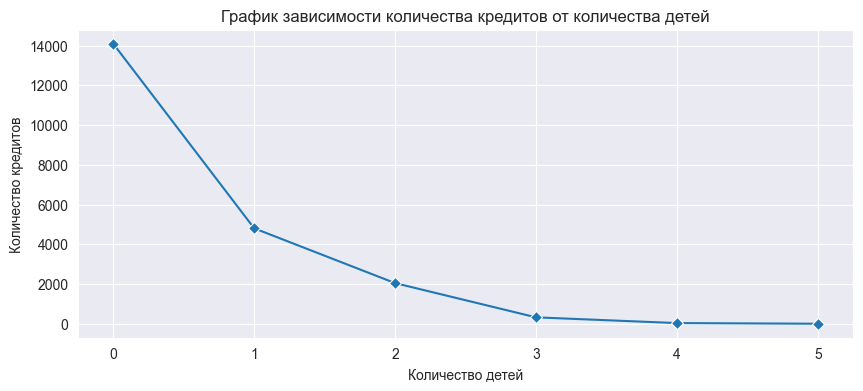

In [22]:
data_ch = data.groupby('children')[['children']].count()
sns.set_style('darkgrid')
plt.figure(figsize=(10, 4))
sns.lineplot(x=data_ch.index, y='children', data=data_ch, marker='D')
plt.title('График зависимости количества кредитов от количества детей')
plt.xlabel('Количество детей')
plt.ylabel('Количество кредитов')
plt.show()

**Вывод:**   
Из полученных данных можно сделать вывод, что в случае отсутствия детей вероятность возникновения задолженности по кредиту меньше, нежели в ситуации, когда есть дети. Это может быть связано с тем, что общая финансовая нагрузка на семьи с детьми выше, ведь общий доход семьи распределяется и между неработатающими членами семьи (детьми).

## Зависимость между семейным положением и возвратом кредита в срок <a id="cor_2"></a> 

In [23]:
# проведение категоризации
def categorize_family(family_status):
    if family_status == 'женат / замужем':
        return 'Состояли в зарегистрированном браке'
    if family_status == 'в разводе':
        return 'Состояли в зарегистрированном браке'
    if family_status == 'вдовец / вдова':
        return 'Состояли в зарегистрированном браке'
    return 'Не состояли в зарегистрированном браке'

In [24]:
data['family_category'] = data['family_status'].apply(categorize_family)

In [25]:
# построение сводной таблицы
data_pivot = data.pivot_table(index=['family_category', 'family_status'], values=['debt'], aggfunc=['sum', 'count', conversion])
data_pivot = data_pivot.sort_values(by=('conversion', 'debt'))
display(data_pivot)

sum  count  \
                                                             debt   debt   
family_category                        family_status                       
Состояли в зарегистрированном браке    вдовец / вдова          63    951   
                                       в разводе               84   1189   
                                       женат / замужем        927  12261   
Не состояли в зарегистрированном браке гражданский брак       385   4134   
                                       Не женат / не замужем  273   2796   

                                                             conversion  
                                                                   debt  
family_category                        family_status                     
Состояли в зарегистрированном браке    вдовец / вдова             6.62%  
                                       в разводе                  7.06%  
                                       женат / замужем            7.56%  
Не состояли в зарегистрированном браке гражданский брак           9.31%  
                                       Не женат / не замужем      9.76%

**Вывод:**   
Можно прийти к выводу, что категория людей "вдовец / вдова" имеют наименьшую степень риска по возникновению задолженности по кредиту. Однако люди, состоящие в гражданском браке, а также находящиеся в разводе, имеют наивысший риск возникновения задолженности. Возможно, это связано с отношением к ответственности людей, состоящих в такого рода отношениях. Люди имеющие статус супругов, имеют среднюю вероятность возникновения задолженности по кредиту.  
Если же судить по категориям выборки, то люди, которые регистрировали свои отношения, подвержены меньшему риску возникновения задолженности по кредиту, нежели, чем люди не состоящие в зарегистрированном браке.

## Зависимость между уровнем дохода и возвратом кредита в срок <a id="cor_3"></a> 

In [26]:
# построение сводной таблицы
data_pivot = data.pivot_table(index=['total_income_category'], values=['debt'], aggfunc=['sum', 'count', conversion])
data_pivot = data_pivot.sort_values(by=('conversion', 'debt'))
display(data_pivot)

,sum,count,conversion
,debt,debt,debt
total_income_category,,,
A,381,5334,7.14%
D,427,5333,8.01%
B,542,6280,8.63%
C,382,4384,8.71%


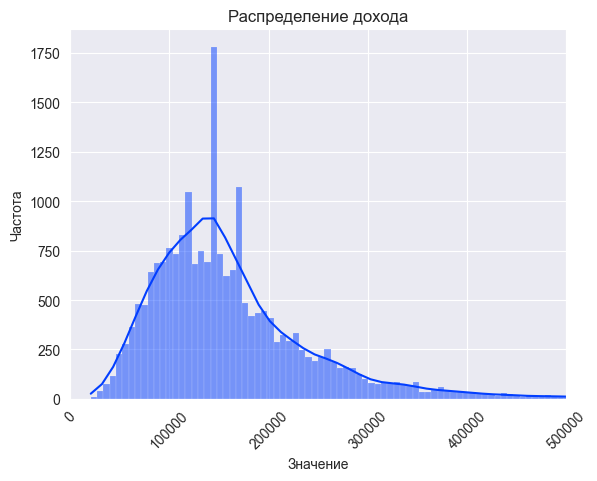

In [27]:
sns.set_palette('bright') 
sns.histplot(x='total_income', data=data, kde=True)
plt.xlim(0, 500000)
plt.title('Распределение дохода')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

**Вывод:**   
На основании полученных данных можно сделать вывод, что люди, получающие наименьший доход из представленных, а также люди со средним уровнем дохода, подвержены наивысшему риску возникновения задолженности. Это, скорее всего, связано с неустойчивым финансовым положением первых и халатным отношением к возникновению задолженности у вторых, поскольку они могут считать, что выплата пенни по кредитам не займет много времени.   
Однако, люди, находящиеся в категории "А", получающие наибольший доход, также подвержены риску возникновения задолженности по кредиту, но в наименьшей степени. Таким образом, можно сделать вывод, что зависимость между уровнем дохода и возвратом кредита в срок, наблюдается.

## Влияние целей кредита на возврат кредита в срок <a id="cor_4"></a> 

In [28]:
# построение сводной таблицы
data_pivot = data.pivot_table(index=['purpose_category'], values=['debt'], aggfunc=['sum', 'count', conversion])
data_pivot = data_pivot.sort_values(by=('conversion', 'debt'))
data_pivot

,sum,count,conversion
,debt,debt,debt
purpose_category,,,
операции с недвижимостью,780,10751,7.26%
проведение свадьбы,183,2313,7.91%
получение образования,369,3988,9.25%
операции с автомобилем,400,4279,9.35%


In [29]:
# столбец с меткой о задолженности заменяем для дальнейшей визуализации
data['debt'] = data['debt'].apply(lambda x: 'должник' if x == 1 else 'не должник')

In [30]:
# группировка данных по целям кредита и задолженности, медианный доход
data_pur = data.groupby(['purpose_category', 'debt'], \
                        as_index = False)[['total_income']].count()

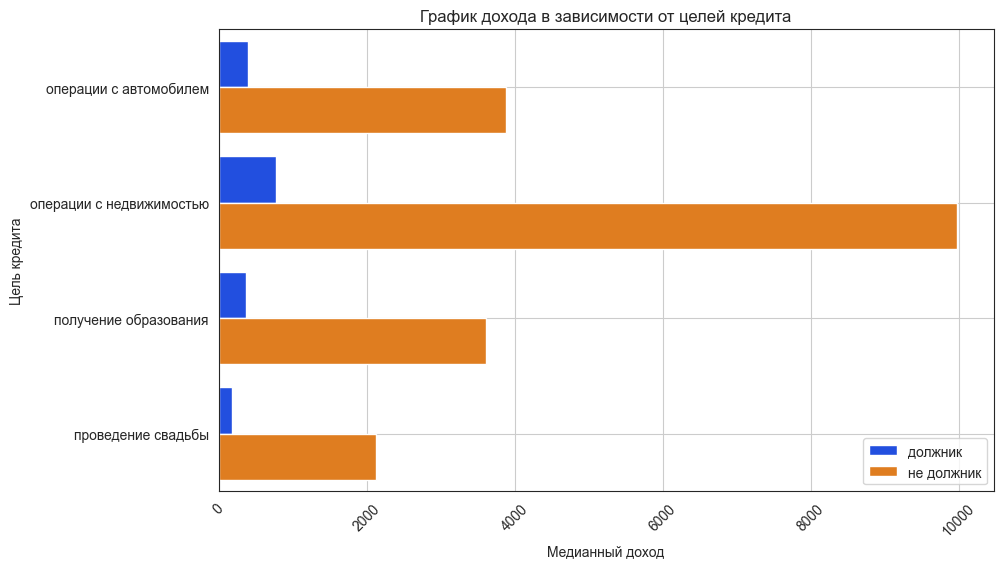

In [31]:
sns.set_style('white')
plt.figure(figsize=(10, 6))
sns.barplot(x='total_income', y='purpose_category', data=data_pur, hue='debt')
plt.title('График дохода в зависимости от целей кредита')
plt.xlabel('Медианный доход')
plt.ylabel('Цель кредита')
plt.xticks(rotation=45)
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.show()

**Вывод:**  
По полученным данным видно, что наименьшему риску подвержены цели, которые связаны с проведением свадьбы и недвижимостью. Данный факт может свидетельствовать о том, что при проведении сделок с недвижимостью, люди боятся санкций со стороны банков, вплоть до изъятия имущества, поскольку оно находится в залоге у банка. Вероятность возврата денег по кредиту на свадьбу велика, поскольку при проведении свадьбы присутствует факт дарения подарков, как в вещественном выражении, так и в денежном, что в последующем может быть использовано в качестве погашения кредита, в случае отсутствия денежных средств.  
При получении образования и операций с автомобилями другая ситуация, они составляют наивысший риск. Это может быть связано с тем, что при получении образования, многие студенты или имеют постоянную, но малооплачиваемую работу, либо же непостоянную работу. При пользовании автомобилем зачастую возникают множество дополнительных трат, что существенно затрудняет выплату по кредиту. Также следует учитывать, что в случае изъятия автомобиля из пользования банком, люди не будут так переживать, как в случае изъятия недвижимости. Данный факт, также может оказывать влияние на распределение зависимости целей кредита и его возврата.

## Зависимость между уровнем образования и возвратом кредита в срок <a id="cor_5"></a> 

In [32]:
# группировка данных по образованию и задолженности, медианный доход
data_ed = data.groupby(['education', 'debt'], \
                        as_index = False)[['total_income']].median()

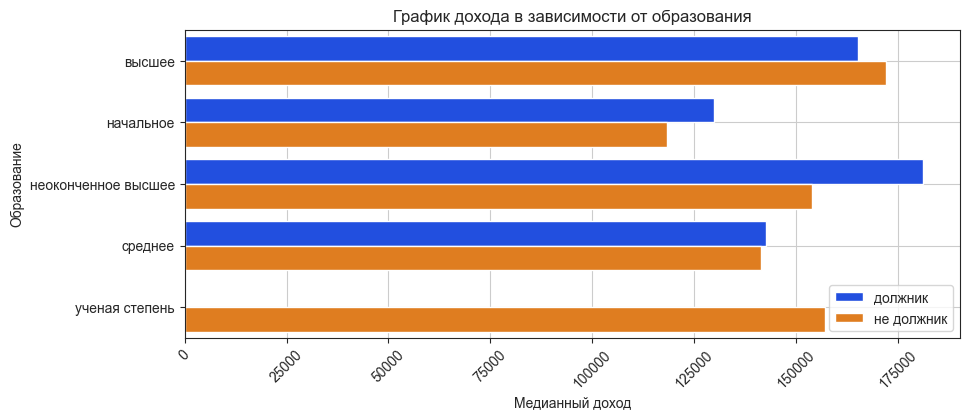

In [33]:
sns.set_style('ticks')
plt.figure(figsize=(10, 4))
sns.barplot(x='total_income', y='education', data=data_ed, hue='debt')
plt.title('График дохода в зависимости от образования')
plt.xlabel('Медианный доход')
plt.ylabel('Образование')
plt.xticks(rotation=45)
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.show()

**Вывод:**   
На основании полученных данных можно сделать вывод, что только у людей с ученой степенью нет риска возникновения задолженности.

# Общий вывод  <a id="done"></a> 

На основании проведенного исследования можно сделать вывод, что на показатель возврата кредита в разной степени влияют большое количество факторов.  
* В меньшей степени заметна корреляция между возможностью возникновения задолженности и количеством детей. Поскольку вероятность возникновения задолженности возникает как в семьях где нет детей, так и в семьях, где они есть. Уровень дохода также оказывает влияние на возможность возникновения задолженности, поскольку люди с наименьшим и высоким уровнем дохода находятся примерно в равном положении по данному показателю, однако люди со средним достатком подвержены высокой зависимости.  
* В большей степени заметная корреляция между целью кредита и семейным положением. Люди, которые берут кредит на проведение свадьбы и различные операции с недвижимостью, более ответственны к процессу погашения кредита, нежели чем люди, которые берут кредит на образование и автомобиль.  

Таким образом, можно сделать вывод, что наилучшим заемщиком является человек, который состоял или состоит в зарегистрированном браке, у которого нет детей, имеет уровень дохода выше минимального, а также берет кредит на операции с недвижимостью. А вот наиболее проблемным заемщиком, который подвержен большому количеству рисков является человек, который берет кредит на сделки с автомобилем, имеет наименьший уровень дохода, не состоял в зарегистрированном браке, а также имеет детей.